In [15]:
%cd binfo1-datapack1


[Errno 2] No such file or directory: 'binfo1-datapack1'
/qbio/junsoopablo/2022_bioinfo/project/binfo1-datapack1


In [16]:
import numpy as np
import pickle
from sklearn import decomposition
from scipy.stats import spearmanr
from functools import reduce
import matplotlib.ticker as ticker
from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio import SeqIO
import matplotlib.colors as mcolors
import pylab as pl
from collections import Counter
from matplotlib import colors as colors

plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
sns.set_style("whitegrid")

# fig.patch.set_facecolor('white')
%matplotlib inline

In [12]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


/blaze/junsoopablo/conda/envs/research/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


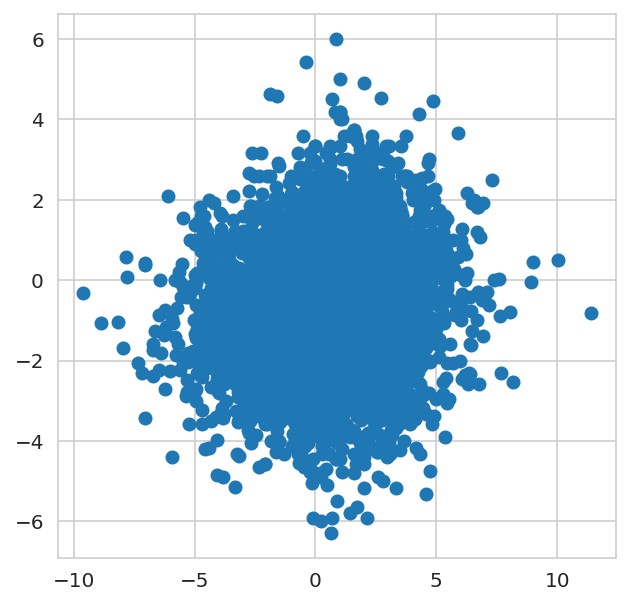

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

In [18]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [25]:
cnts2 = cnts.copy(deep=True)
cnts2.reset_index(inplace=True)
cnts2['gene_id'] = cnts2['Geneid'].str.split('.', expand=True)[0]
cnts2 = cnts2.drop('Geneid', axis=1)
cnts2 = cnts2.set_index('gene_id')
cnts2

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
gene_id,,,,,,,,,,,,,
ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.000000,NaN
ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064368,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780
ENSMUSG00000064369,chrM,14071,14139,-,69,81,61,30,25,18,19,1.327869,0.789474
ENSMUSG00000064370,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302


In [31]:
cntslocal = pd.merge(cnts2, mouselocal, left_index=True, right_on='gene_id')
cntslocal

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,Gene names,type
7618,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.000000,NaN,ENSMUSG00000051951,Xkr4 Xrg4,integral membrane
2821,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,6.000000,0.416667,ENSMUSG00000025902,Sox17 Sox-17,nucleus
2822,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,3.562718,0.760459,ENSMUSG00000025903,Lypla1 Apt1 Pla1a,cytoplasm
246,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4979799;4979799;4980625;4980697;4982537;498253...,4980885;4980885;4980885;4980885;4982771;498277...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4239,5,1,1,8,3,2,5.000000,12.000000,ENSMUSG00000002459,Rgs20 Rgsz1,nucleus
2823,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5658689;5658716;5658716;5658780;5659164;565922...,5661534;5658886;5658886;5658886;5659528;565952...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,9151,49,1,20,20,8,7,49.000000,1.142857,ENSMUSG00000025905,Oprk1,integral membrane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,chrM,9459,9806,+,348,0,36,110,135,12,14,0.000000,1.051948,ENSMUSG00000064360,Mtnd3 mt-Nd3 Nd3,integral membrane
8514,chrM,9877,10173,+,297,4,12,8,4,4,4,0.333333,0.500000,ENSMUSG00000065947,Mtnd4l mt-Nd4l Nd4l,integral membrane
8511,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,2498,0.173488,1.107123,ENSMUSG00000064363,Mtnd4 mt-Nd4 Nd4,integral membrane
8512,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,0.693997,1.263275,ENSMUSG00000064367,Mtnd5 mt-Nd5 Nd5,integral membrane


/blaze/junsoopablo/conda/envs/research/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


AttributeError: 'AxesSubplot' object has no attribute 'ygrid'

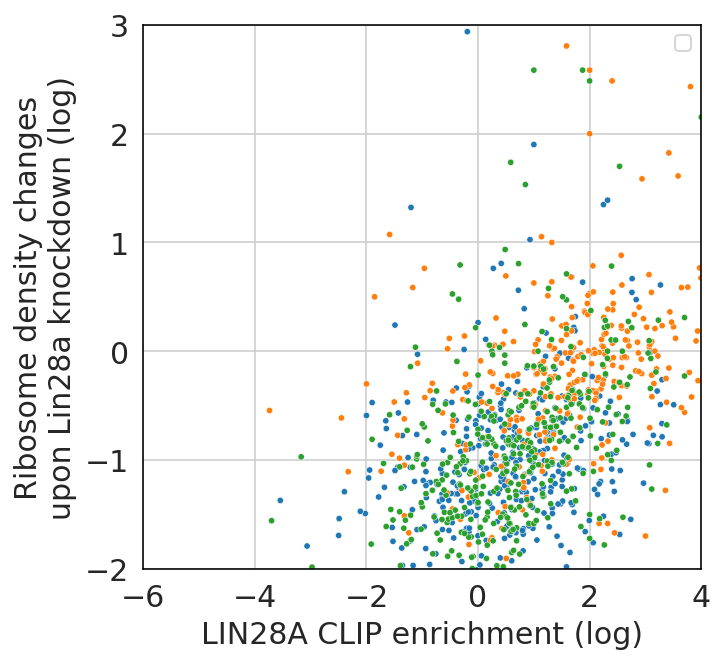

In [64]:
cntslocal = pd.merge(cnts2, mouselocal, left_index=True, right_on='gene_id')
cntslocal['clip_enrichment'] = np.log2(cntslocal['clip_enrichment'])
cntslocal['rden_change'] = np.log2(cntslocal['rden_change'])
region_list = ['nucleus','integral membrane','cytoplasm']
cntslocal_sample = pd.DataFrame(columns=cntslocal.columns)
scount = 500
for region in region_list:
    df = cntslocal.loc[cntslocal['type']==region]
    df = df.sample(scount)
    cntslocal_sample = pd.concat([cntslocal_sample, df], ignore_index=True)

color_map = {'nucleus':'blue', 'cytoplasm':'green', 'integral membrane' : 'red'}
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
g = sns.scatterplot(data=cntslocal_sample, x='clip_enrichment', y='rden_change', s=10, hue='type',
                    hue_order=region_list)
g.set_xlim(-6, 4)
g.set_ylim(-2, 3)
plt.tick_params(labelsize=15)
g.set_xlabel('LIN28A CLIP enrichment (log)', fontsize=15)
g.set_ylabel('Ribosome density changes\nupon Lin28a knockdown (log)', fontsize=15)

# g.set_ylabel('-log10 of p-value', fontsize=15)
# g.set_xlabel('Wobble base', fontsize=15)
# g.set_title('Wilcoxon rank sum test', fontsize=15)
g.legend([],[], frameon=None)
g.spines['left'].set_edgecolor('black')
g.spines['bottom'].set_edgecolor('black')
g.spines['top'].set_edgecolor('black')
g.spines['right'].set_edgecolor('black')
g.ygrid(None)
handles, labels = plt.gca().get_legend_handles_labels()
leg = fig.legend(handles, labels, bbox_to_anchor=(1.5,0.9), fontsize=15, ncol=1,frameon=False)
leg._legend_box.align = "left"
leg.get_frame().set_edgecolor("black")

# sns.scatterplot(data=cntslocal, x='clip_enrichment', y='rden_change', hue='type')

In [51]:
df

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,Gene names,type
3025,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,165156267;165157074;165160858;165160858;165164...,165157572;165157572;165160963;165160963;165164...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,6424,283,118,397,326,110,103,1.262015,-0.189408,ENSMUSG00000026571,Dcaf6 Iqwd1,nucleus
5194,chr17;chr17;chr17;chr17;chr17;chr17;chr17;chr1...,24633539;24633620;24633625;24633637;24633649;2...,24635644;24633708;24633708;24633708;24633708;2...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,5131,1072,1074,1485,1343,191,420,-0.002689,-1.281820,ENSMUSG00000034681,Rnps1,nucleus
2162,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,93680789;93680812;93680819;93680904;93681090;9...,93680863;93680863;93680863;93681509;93681253;9...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,4681,708,653,1342,1210,246,653,0.116666,-1.557802,ENSMUSG00000022945,Chaf1b,nucleus
2419,chr18;chr18;chr18;chr18;chr18;chr18;chr18;chr1...,32200794;32200821;32200847;32200855;32203160;3...,32201092;32201092;32201092;32201092;32203545;3...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,11083,2292,644,1794,1661,1014,1683,1.831474,-0.842105,ENSMUSG00000024384,Iws1 Iws1l,nucleus
6928,chr19;chr19;chr19;chr19;chr19;chr19;chr19;chr1...,3817421;3817421;3817421;3817421;3817421;381752...,3817730;3817730;3817730;3817730;3817730;381773...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14752,673,543,1011,717,69,138,0.309654,-1.495738,ENSMUSG00000045098,Kmt5b Suv420h1,nucleus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,chr12;chr12;chr12;chr12;chr12;chr12,104998947;104998949;105001475;105004383;105006...,104999241;104999241;105001731;105004880;105009...,+;+;+;+;+;+,3682,321,305,568,558,496,621,0.073764,-0.349879,ENSMUSG00000021102,Glrx5,nucleus
5939,chr11;chr11,96209093;96210856,96210049;96212464,+;+,2566,10,0,0,1,0,1,inf,NaN,ENSMUSG00000038692,Hoxb4 Hox-2.6 Hoxb-4,nucleus
1356,chr10;chr10;chr10;chr10;chr10;chr10;chr10;chr1...,79412213;79412311;79412311;79415773;79415773;7...,79412600;79412600;79412600;79415954;79415932;7...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,1564,0,0,0,0,2,2,NaN,NaN,ENSMUSG00000020317,Theg,nucleus
7913,chr17;chr17;chr17;chr17;chr17;chr17;chr17;chr1...,84013592;84013592;84013592;84013613;84013620;8...,84013714;84013714;84013714;84013714;84013714;8...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,5319,617,473,1808,886,400,625,0.383430,-1.672872,ENSMUSG00000055817,Mta3,nucleus


In [48]:
cntslocal

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,Gene names,type
7618,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,2.000000,NaN,ENSMUSG00000051951,Xkr4 Xrg4,integral membrane
2821,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,2.584963,-1.263034,ENSMUSG00000025902,Sox17 Sox-17,nucleus
2822,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,1.832978,-0.395057,ENSMUSG00000025903,Lypla1 Apt1 Pla1a,cytoplasm
246,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4979799;4979799;4980625;4980697;4982537;498253...,4980885;4980885;4980885;4980885;4982771;498277...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4239,5,1,1,8,3,2,2.321928,3.584963,ENSMUSG00000002459,Rgs20 Rgsz1,nucleus
2823,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5658689;5658716;5658716;5658780;5659164;565922...,5661534;5658886;5658886;5658886;5659528;565952...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,9151,49,1,20,20,8,7,5.614710,0.192645,ENSMUSG00000025905,Oprk1,integral membrane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,chrM,9459,9806,+,348,0,36,110,135,12,14,-inf,0.073063,ENSMUSG00000064360,Mtnd3 mt-Nd3 Nd3,integral membrane
8514,chrM,9877,10173,+,297,4,12,8,4,4,4,-1.584963,-1.000000,ENSMUSG00000065947,Mtnd4l mt-Nd4l Nd4l,integral membrane
8511,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,2498,-2.527089,0.146816,ENSMUSG00000064363,Mtnd4 mt-Nd4 Nd4,integral membrane
8512,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,-0.526998,0.337168,ENSMUSG00000064367,Mtnd5 mt-Nd5 Nd5,integral membrane


In [47]:
cntslocal

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,gene_id,Gene names,type
7618,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,2.000000,NaN,ENSMUSG00000051951,Xkr4 Xrg4,integral membrane
2821,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,2.584963,-1.263034,ENSMUSG00000025902,Sox17 Sox-17,nucleus
2822,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,1.832978,-0.395057,ENSMUSG00000025903,Lypla1 Apt1 Pla1a,cytoplasm
246,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4979799;4979799;4980625;4980697;4982537;498253...,4980885;4980885;4980885;4980885;4982771;498277...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4239,5,1,1,8,3,2,2.321928,3.584963,ENSMUSG00000002459,Rgs20 Rgsz1,nucleus
2823,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5658689;5658716;5658716;5658780;5659164;565922...,5661534;5658886;5658886;5658886;5659528;565952...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,9151,49,1,20,20,8,7,5.614710,0.192645,ENSMUSG00000025905,Oprk1,integral membrane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8510,chrM,9459,9806,+,348,0,36,110,135,12,14,-inf,0.073063,ENSMUSG00000064360,Mtnd3 mt-Nd3 Nd3,integral membrane
8514,chrM,9877,10173,+,297,4,12,8,4,4,4,-1.584963,-1.000000,ENSMUSG00000065947,Mtnd4l mt-Nd4l Nd4l,integral membrane
8511,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,2498,-2.527089,0.146816,ENSMUSG00000064363,Mtnd4 mt-Nd4 Nd4,integral membrane
8512,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,-0.526998,0.337168,ENSMUSG00000064367,Mtnd5 mt-Nd5 Nd5,integral membrane


In [28]:
cnts

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.000000,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,61,30,25,18,19,1.327869,0.789474
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302
